# Imports

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
! pip install webdriver-manager


from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

from selenium.webdriver.common.by import By
! mkdir reviews_pages
! mkdir reviews
pip install scikit-plot

In [ ]:
from gensim.models import Word2Vec
import gensim
import pickle
import pandas as pd
from tqdm.notebook import tqdm
import os
import numpy as np
from sklearn.decomposition import TruncatedSVD
from xgboost import XGBClassifier
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


# !pip install selenium
# !pip install scikit-plot
# !pip install langdetect
# !pip install requests
# !pip install beautifulsoup4
# !pip install wordcloud
# !pip install fake_useragent
# !pip install textblob

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

import time
from tqdm import tqdm
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")
import requests

import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

# from imblearn.over_sampling import SMOTE

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


ModuleNotFoundError: No module named 'selenium'

# Scraping Reviews from IMDB


1. **The Silence of the Lambs** (1991) - IMDb ID: tt0102926
2. **The Lord of the Rings: The Two Towers** (2002) - IMDb ID: tt0167261
3. **Catch Me If You Can** (2002) - IMDb ID: tt0264464
4. **Lost in Translation** (2003) - IMDb ID: tt0335266
5. **Dead Poets Society** (1989) - IMDb ID: tt0097165
6. **The Godfather: Part II** (1974) - IMDb ID: tt0071562
7. **The Avengers** (2012) - IMDb ID: tt0848228
8. **Epic Movie** (2007) - IMDb ID: tt0799949
9. **Django Unchained** (2012) - IMDb ID: tt1853728
10. **Interstellar** (2014) - IMDb ID: tt0816692
11. **Birdemic: Shock and Terror** (2010) - IMDb ID: tt1316037
12. **Inception** (2010) - IMDb ID: tt1375666
13. **Amélie** (2001) - IMDb ID: tt0211915
14. **The Pursuit of Happyness** (2006) - IMDb ID: tt0454921
15. **The Truman Show** (1998) - IMDb ID: tt0120382
16. **The Shawshank Redemption** (1994) - IMDb ID: tt0111161
17. **Batman & Robin** (1997) - IMDb ID: tt0118688
18. **The Happening** (2008) - IMDb ID: tt0949731
19. **Forrest Gump** (1994) - IMDb ID: tt0109830
20. **The Dark Knight** (2008) - IMDb ID: tt0468569
21. **The Sixth Sense** (1999) - IMDb ID: tt0167404
22. **The Departed** (2006) - IMDb ID: tt0407887
23. **The Room** (2003) - IMDb ID: tt0368226
24. **Jack and Jill** (2011) - IMDb ID: tt0810913
25. **Gladiator** (2000) - IMDb ID: tt0172495
26. **The Social Network** (2010) - IMDb ID: tt1285016
27. **Titanic** (1997) - IMDb ID: tt0120338
28. **Pulp Fiction** (1994) - IMDb ID: tt0110912
29. **The Godfather** (1972) - IMDb ID: tt0068646
30. **Catwoman** (2004) - IMDb ID: tt0327554
31. **The Last Airbender** (2010) - IMDb ID: tt0938283
32. **Movie 43** (2013) - IMDb ID: tt1333125
33. **Schindler's List** (1993) - IMDb ID: tt0108052
34. **Black Swan** (2010) - IMDb ID: tt0947798
35. **Fight Club** (1999) - IMDb ID: tt0169547
36. **Gigli** (2003) - IMDb ID: tt0299930
37. **Shutter Island** (2010) - IMDb ID: tt1130884
38. **The Grand Budapest Hotel** (2014) - IMDb ID: tt2278388
39. **The Lord of the Rings: The Fellowship of the Ring** (2001) - IMDb ID: tt0120737
40. **The King's Speech** (2010) - IMDb ID: tt1504320
41. **The Emoji Movie** (2017) - IMDb ID: tt4877122
42. **Cats** (2019) - IMDb ID: tt5697572
43. **Disaster Movie** (2008) - IMDb ID: tt1213644
44. **Goodfellas** (1990) - IMDb ID: tt0099685
45. **Mystic River** (2003) - IMDb ID: tt0327056


In [ ]:
def scroll_to_bottom(driver):
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

def get_imdb_reviews(imdb_ids):
    options = Options()
    options.headless = False  # True, чтобы браузер работал в фоновом режиме

    driver = webdriver.Chrome(options=chrome_options)
    # driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

    all_reviews = []

    total_imdb_ids = len(imdb_ids)
    index = 0
    for imdb_id in tqdm(imdb_ids):
        driver.get(f'https://www.imdb.com/title/{imdb_id}/reviews')
        print(f"Scraping movie {index} out of {total_imdb_ids}")
        index += 1

        reviews = []
        unique_reviews = set()
        load_more_button_class = "ipl-load-more__button"

        # Прокручиваем страницу до конца, чтобы загрузить все отзывы
        while True:
            try:
                scroll_to_bottom(driver)
                load_more_button = WebDriverWait(driver, 10).until(
                    EC.element_to_be_clickable((By.CLASS_NAME, load_more_button_class))
                )
                driver.execute_script("arguments[0].click();", load_more_button)
                time.sleep(1)
            except Exception as e:
                print("No more reviews or there is an issue: ", e)
                break

        # Ждем, чтобы все элементы загрузились
        time.sleep(5)

        # Собираем все отзывы
        review_elements = driver.find_elements(By.CLASS_NAME, "text.show-more__control")
        rating_elements = driver.find_elements(By.CLASS_NAME, "rating-other-user-rating")

        for j, element in enumerate(review_elements):
            review_text = element.text.strip() if element.text else "No review text"
            review_rating = "No rating"
            if j < len(rating_elements):
                rating_span = rating_elements[j].find_elements(By.TAG_NAME, "span")
                if rating_span:
                    review_rating = rating_span[0].text

            if review_text not in unique_reviews:
                reviews.append({"IMDb ID": imdb_id, "Review": review_text, "Rating": review_rating})
                unique_reviews.add(review_text)

        with open(f'reviews/movie_{imdb_id}.pkl', 'wb') as f:
            pickle.dump(reviews, f)
        all_reviews.extend(reviews)

    driver.quit()
    return all_reviews

def save_reviews_to_csv(reviews, filename):
    df = pd.DataFrame(reviews)
    df.to_csv(filename, index=False, encoding='utf-8')
    print(f'Saved {len(reviews)} reviews to {filename}')

if __name__ == "__main__":
    imdb_ids = ['tt0111161', 'tt0068646', 'tt0468569', 'tt0110912', 'tt0108052',
                'tt1285016', 'tt2278388', 'tt0264464', 'tt0335266', 'tt0097165',
                'tt0299930', 'tt0327554', 'tt1213644', 'tt0938283', 'tt0118688',
                'tt0071562', 'tt0102926', 'tt0099685', 'tt0120737', 'tt0120338',
                'tt0120382', 'tt1504320', 'tt1130884', 'tt0327056', 'tt0211915',
                'tt1316037', 'tt0810913', 'tt1213644', 'tt0299930', 'tt0368226',
                'tt0816692', 'tt0167261', 'tt0848228', 'tt1853728', 'tt0172495',
                'tt0167404', 'tt0169547', 'tt0407887', 'tt0947798', 'tt0454921',
                'tt0799949', 'tt1333125', 'tt0949731', 'tt4877122', 'tt5697572',
                'tt0109830', 'tt0111161', 'tt0468569', 'tt0068646', 'tt0110912',
                'tt1375666', 'tt1285016', 'tt2278388', 'tt0264464', 'tt0335266',
                'tt0299930', 'tt0327554', 'tt1213644', 'tt0938283', 'tt0118688',
                'tt0071562', 'tt0102926', 'tt0099685', 'tt0120737', 'tt0120338',
                'tt0120382', 'tt1504320', 'tt1130884', 'tt0327056', 'tt0211915']

    all_reviews = get_imdb_reviews(imdb_ids)
    save_reviews_to_csv(all_reviews, 'all_reviews.csv')

# Creating and preprocessing a DataFrame

### Creating a DataFrame

In [ ]:
tqdm.pandas()

In [ ]:
! unzip Reviews.zip

In [ ]:
all_reviews = []
for filename in tqdm(os.listdir("Reviews/")):
    with open(f'Reviews/{filename}', 'rb') as f:
        x = pickle.load(f)

    for review in x:
        imdb_id = review["IMDb ID"]
        review_text = review["Review"]
        rating = review["Rating"]

        all_reviews.append((imdb_id, review_text, rating))

  0%|          | 0/45 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame(all_reviews, columns=["imdb_id", "review", "rating"])
df = df[df["rating"] != "No rating"].reset_index(drop=True)
df["rating"] = df["rating"].astype(int)

df.head()

,imdb_id,review,rating
0,tt0120338,"If you're a Millennial like me, you probably e...",9
1,tt0120338,I've never watched Titanic until now. It caugh...,9
2,tt0120338,No review text,9
3,tt0120338,"You can watch this movie in 1997, you can watc...",10
4,tt0120338,I have watched Titanic how many times I don't ...,10


In [ ]:
df = df[~df["rating"].isin([5, 6])]

In [ ]:
df["rating"] = (df["rating"] >= 7) * 1

In [ ]:
df["rating"].value_counts(normalize=True)

rating
1    0.835057
0    0.164943
Name: proportion, dtype: float64

### Removing all non-letter characters, lowercase conversion, tokenization and lemmatization

In [ ]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()

    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]

    return ' '.join(filtered_text)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word) for word in word_tokens]
    return ' '.join(lemmatized_text)

In [ ]:
df["cleaned_review"] = df["review"].progress_apply(clean_text)
df["lemmatized_review"] = df["cleaned_review"].progress_apply(lemmatize_text)

  0%|          | 0/71643 [00:00<?, ?it/s]

  0%|          | 0/71643 [00:00<?, ?it/s]

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

### Vectorization

In [ ]:
X_train, X_test = df[:50_000], df[50_000:].reset_index(drop=True)

In [ ]:
model = gensim.models.Word2Vec(
    df["lemmatized_review"].apply(lambda x: x.split()).values,
    min_count=1,
    vector_size=50
)

In [ ]:
model.wv.most_similar("masterpiece")

[('gem', 0.7780922055244446),
 ('classic', 0.7321485280990601),
 ('greatness', 0.6887320876121521),
 ('genius', 0.6246114373207092),
 ('pinnacle', 0.6236932277679443),
 ('film', 0.6026254296302795),
 ('milestone', 0.5964140295982361),
 ('timeless', 0.5954636335372925),
 ('brilliance', 0.5826553702354431),
 ('achievement', 0.5781294703483582)]

In [ ]:
model.wv.most_similar("actor")

[('actress', 0.7323344945907593),
 ('cast', 0.7098230719566345),
 ('acting', 0.6415728330612183),
 ('role', 0.6297093629837036),
 ('withmore', 0.6048295497894287),
 ('casting', 0.591067910194397),
 ('talent', 0.5679706931114197),
 ('performer', 0.554907500743866),
 ('intellegent', 0.5523759126663208),
 ('talented', 0.5502094030380249)]

In [ ]:
def text2vec(text):

    words = text.split()
    vecs = []
    for word in words:
        try:
            vecs.append(model.wv[word])
        except:
            continue
    if len(vecs) == 0:
        return list(np.zeros(50))

    text_vec = np.stack(vecs).mean(axis=0)
    return list(text_vec)

In [ ]:
text_vecs = X_train["lemmatized_review"].progress_apply(text2vec)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
X_train = pd.concat([X_train, pd.DataFrame([el for el in text_vecs.values])], axis=1)

In [ ]:
text_vecs = X_test["lemmatized_review"].progress_apply(text2vec)

  0%|          | 0/21643 [00:00<?, ?it/s]

In [ ]:
X_test = pd.concat([X_test, pd.DataFrame([el for el in text_vecs.values])], axis=1)

# Applying a Gradient Boosting Model

## Choosing parameters

In [ ]:
max_score = 0.5
for n_estimators in [100, 200, 500, 1000]:
    for max_depth in [3, 4, 5, 6]:
        print(n_estimators, max_depth)
        for learning_rate in [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]:
            for colsample_bytree in [0.2, 0.5, 0.75, 1.0]:

                model = LGBMClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    learning_rate=learning_rate,
                    colsample_bytree=colsample_bytree,
                    n_jobs=-1,
                    verbose=-1
                )
                model.fit(X_train.iloc[:, -50:], X_train["rating"])
                preds = model.predict_proba(X_test.iloc[:, -50:])

                score = roc_auc_score(X_test["rating"], preds[:, 1])
                if score > max_score:
                    max_n_estimators = n_estimators
                    max_max_depth = max_depth
                    max_learning_rate = learning_rate
                    max_colsample_bytree = colsample_bytree

                    max_score = score

                    print(
                        n_estimators,
                        max_depth,
                        learning_rate,
                        colsample_bytree,
                        roc_auc_score(X_test["rating"], preds[:, 1])
                    )

100 3
100 3 0.05 0.2 0.7453945402004709
100 3 0.05 0.5 0.7470064251462587
100 3 0.05 0.75 0.7475608144817758
100 3 0.06 0.5 0.748952622420296
100 3 0.06 1.0 0.7492499744096505
100 3 0.07 0.75 0.7502319430555665
100 3 0.07 1.0 0.7506915457358604
100 3 0.08 0.75 0.7515561216053418
100 3 0.09 0.5 0.7518258832607617
100 3 0.1 0.2 0.7520975661608964
100 3 0.1 0.5 0.7525179329296618
100 3 0.1 0.75 0.7544630987157582
100 3 0.15 1.0 0.755226919473075
100 4
100 4 0.07 1.0 0.7552567066401052
100 4 0.08 0.75 0.7563672175809639
100 4 0.09 0.75 0.7566990968575051
100 4 0.1 0.75 0.7569500161416051
100 4 0.11 0.75 0.7578354579885198
100 4 0.13 0.5 0.7580601176368691
100 5
100 5 0.09 0.5 0.7592827221832898
100 6
100 6 0.08 0.75 0.7595007204667681
200 3
200 4
200 5
200 6
200 6 0.05 0.2 0.7600987787497737
200 6 0.06 0.2 0.760224856497193
500 3
500 4


KeyboardInterrupt: 

In [ ]:
params = {
    "n_estimators": 200,
    "max_depth": 6,
    "learning_rate": 0.06,
    "colsample_bytree": 0.2,
    "n_jobs": -1,
    "verbose": -1
}

In [ ]:
model = LGBMClassifier(**params)
model.fit(X_train.iloc[:, -50:], X_train["rating"])
preds = model.predict_proba(X_test.iloc[:, -50:])
score = roc_auc_score(X_test["rating"], preds[:, 1])
print(score)

0.760224856497193


In [ ]:
X_test["rating"].value_counts(normalize=True)

rating
1    0.838285
0    0.161715
Name: proportion, dtype: float64

# Подбираем отсечку максимизирующую accuracy

In [ ]:
[(round(t, 2), accuracy_score(X_test["rating"], (preds[:, 1] > t) * 1)) for t in np.linspace(0, 1, 101)]

[(0.0, 0.8382848958092686),
 (0.01, 0.8382848958092686),
 (0.02, 0.8382848958092686),
 (0.03, 0.8382848958092686),
 (0.04, 0.8382848958092686),
 (0.05, 0.8382848958092686),
 (0.06, 0.8382848958092686),
 (0.07, 0.8382848958092686),
 (0.08, 0.8384235087557178),
 (0.09, 0.8384235087557178),
 (0.1, 0.8387931432795823),
 (0.11, 0.8389779605415145),
 (0.12, 0.8392089821189299),
 (0.13, 0.8394862080118283),
 (0.14, 0.8398558425356928),
 (0.15, 0.8401792727440743),
 (0.16, 0.8408723374763203),
 (0.17, 0.8414729935776002),
 (0.18, 0.8418426281014647),
 (0.19, 0.8428591230420921),
 (0.2, 0.8437370050362704),
 (0.21, 0.8447997042923809),
 (0.22, 0.845585177655593),
 (0.23, 0.8462320380723559),
 (0.24, 0.8471099200665342),
 (0.25, 0.8478953934297463),
 (0.26, 0.848357436584577),
 (0.27, 0.8488194797394076),
 (0.28, 0.849789770364552),
 (0.29, 0.850390426465832),
 (0.3, 0.8513145127754932),
 (0.31, 0.8516841472993577),
 (0.32, 0.852562029293536),
 (0.33, 0.853255094025782),
 (0.34, 0.85353231991868

In [ ]:
threshold = 0.58

In [ ]:
preds_class = 1 * (preds[:, 1] > threshold)

In [ ]:
X_test["preds"] = preds_class

In [ ]:
print(classification_report(X_test["rating"], X_test["preds"]))

              precision    recall  f1-score   support

           0       0.64      0.33      0.44      3500
           1       0.88      0.96      0.92     18143

    accuracy                           0.86     21643
   macro avg       0.76      0.65      0.68     21643
weighted avg       0.84      0.86      0.84     21643



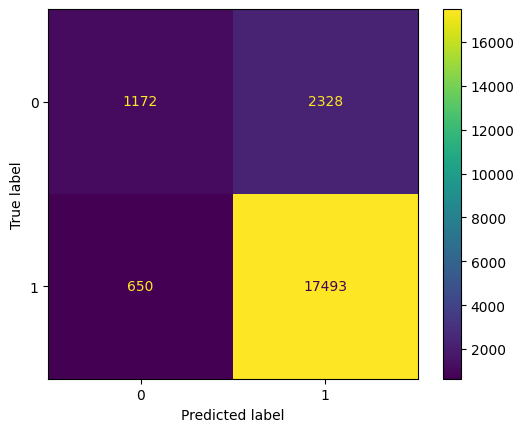

In [ ]:
conf_matrix = confusion_matrix(X_test["rating"], X_test["preds"])
ConfusionMatrixDisplay(conf_matrix, ).plot()

### Applying CountVectorizer

the quality is poorer than that of Word2Vec

In [ ]:
count = CountVectorizer(max_features=500)

In [ ]:
count.fit(X_train["lemmatized_review"])

CountVectorizer(max_features=500)

In [ ]:
X_train_count = count.transform(X_train["lemmatized_review"])

In [ ]:
X_train_count

<50000x500 sparse matrix of type '<class 'numpy.int64'>'
	with 1734961 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_count = count.transform(X_test["lemmatized_review"])

In [ ]:
%%time
model = LGBMClassifier(**params)
model.fit(pd.DataFrame(X_train_count.toarray()), X_train["rating"])
preds = model.predict_proba(pd.DataFrame(X_test_count.toarray()))
score = roc_auc_score(X_test["rating"], preds[:, 1])
print(score)

0.7291526917110889
CPU times: user 13.4 s, sys: 311 ms, total: 13.7 s
Wall time: 8.76 s
